## K-Means Clustering

#### Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Data Preprocessing

In [2]:
dataset = pd.read_csv('MallCustomers.csv')
X = dataset.iloc[:, [3, 4]].values

#### Elbow Method

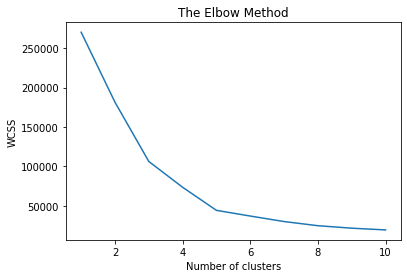

In [3]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [4]:
n_clusters = 5

#### K-Means Clustering

In [5]:
kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

#### Clusters Visualization

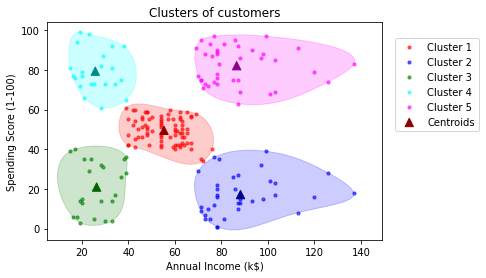

In [6]:
from matplotlib.colors import LinearSegmentedColormap
from scipy import interpolate
from scipy.spatial import ConvexHull

colors = ['red', 'blue', 'green', 'cyan', 'magenta']
cmap = LinearSegmentedColormap.from_list('', colors)

for i in range(n_clusters):
    points = X[y_kmeans == i]
    plt.scatter(points[:, 0], points[:, 1], 
                s = 10, c = colors[i], label = f'Cluster {i + 1}', alpha = 0.6)
    
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices, 0], points[hull.vertices, 0][0])
    y_hull = np.append(points[hull.vertices, 1], points[hull.vertices, 1][0])
    dist = np.sqrt((x_hull[:-1] - x_hull[1:]) ** 2 + (y_hull[:-1] - y_hull[1:]) ** 2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], u = dist_along, s = 0, per = 1)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)
    plt.fill(interp_x, interp_y, '--', c = colors[i], alpha = 0.2)


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s = 70, c = ['dark' + c for c in colors], marker = '^', label = 'Centroids')

plt.xlim(X[:, 0].min() - 10, X[:, 1].max() + 50)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc = (1.04, 0.5))
plt.show()